# What happens to bitcoin hash rate during bear markets?

* chart each bear market against hash rate over the same period

In [50]:
# Imports
%matplotlib inline
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import backtesters
reload(backtesters)
from backtesters import MABacktester # use this to calculate drawdown table

In [10]:
# Get price data 
bitcoin = quandl.get("BCHAIN/MKPRU")
bitcoin.columns = ['Close']
bitcoin = bitcoin.shift(-1) # data set has daily open, we want daily close
bitcoin = bitcoin.loc['2010-08-17':] # remove the 0's

In [51]:
# Get hashrate data
hashrate = pd.read_csv('data/btc_hash_rate.csv', index_col = 0, parse_dates = [0])

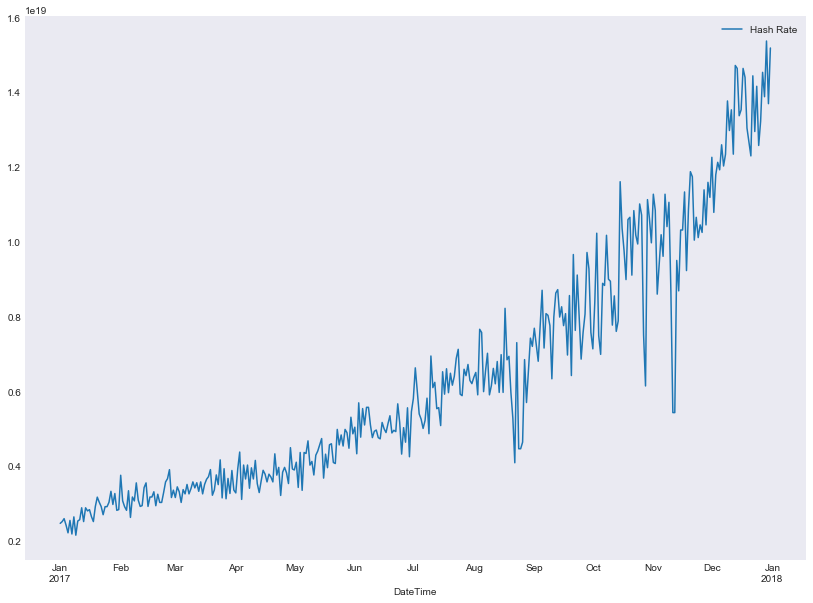

In [60]:
sns.set_style(style='dark')
hashrate.loc['2017'].plot(figsize=(14,10));

In [12]:
bitcoin_drawdowns = MABacktester(bitcoin['Close']).drawdowns(target='market')
bitcoin_drawdowns

,dd,high,low,highd,lowd,days,recoveryd,rdays
0,93.46,35.00000,2.29000,2011-06-09,2011-11-20,164 days,2013-03-03,469 days
1,84.67,1151.00000,176.50000,2013-12-03,2015-01-13,406 days,2017-02-23,772 days
2,71.49,237.99000,67.85844,2013-04-08,2013-07-04,87 days,2013-11-04,123 days
3,66.13,19498.68333,6603.87667,2017-12-16,2018-04-06,111 days,2018-06-11,66 days
4,65.20,0.17500,0.06090,2010-09-14,2010-09-16,2 days,2010-10-23,37 days
5,59.20,0.50000,0.20400,2010-11-06,2010-12-09,33 days,2011-01-31,53 days
6,39.98,7.22000,4.33333,2012-01-05,2012-02-18,44 days,2012-07-09,142 days
7,35.45,1.10000,0.71000,2011-02-09,2011-04-04,54 days,2011-04-17,13 days
8,34.80,2961.82961,1931.21430,2017-06-11,2017-07-16,35 days,2017-08-05,20 days
9,33.83,15.40000,10.18999,2012-08-16,2012-09-01,16 days,2013-01-17,138 days


In [111]:
def draw_chart(i, label_pos = [0.5, 0.5], save = False):    
    row = bitcoin_drawdowns.iloc[i]
    high = row['highd']
    recovery = row['recoveryd']
    low = row['lowd']
    start = high - timedelta(days=extra_days)
    end = low + timedelta(days=extra_days)
    if row['rdays'].days > 100:
        end += timedelta(days=extra_days)
    if row['rdays'].days > 500:
        end += timedelta(days=extra_days * 4)
    if i == 3:
        end = '2018-06-12'
    fig, ax = plt.subplots(figsize=(16,10))
    ax.plot(bitcoin['Close'].loc[start:end].index, bitcoin['Close'].loc[start:end], label='Price')       
    text = "%.1f%% drop over %d days\nRecovery took %d days" % (row['dd'],row['days'].days,row['rdays'].days)
    if i == 3:
        text = "%.1f%% drop over %d days\nBeen %d days so far" % (row['dd'],row['days'].days,row['rdays'].days)
    ax.plot([high, low], [bitcoin['Close'].loc[high], bitcoin['Close'].loc[low]], 'x', color='Red', markersize=12)
    ax.legend(['Price'], loc='upper left')
    ax.text(label_pos[0], label_pos[1],text, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, size=14)
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(hashrate.loc[start:end], color='white', alpha=0.8, label='Hash Rate')
    ax.set_ylabel('Price', color='C0', size=12)
    ax2.set_ylabel('Hash Rate', color='gray', size = 12)
    ax2.legend(['Hash Rate'])
    plt.title('Bitcoin Price and Hash Rate', size = 18)
    plt.show()
    if save:
        fig.savefig("drawdowns/hashrate/" + high.strftime("%Y-%m-%d") + '.png', dpi=100, bbox_inches='tight')
    plt.close(fig)

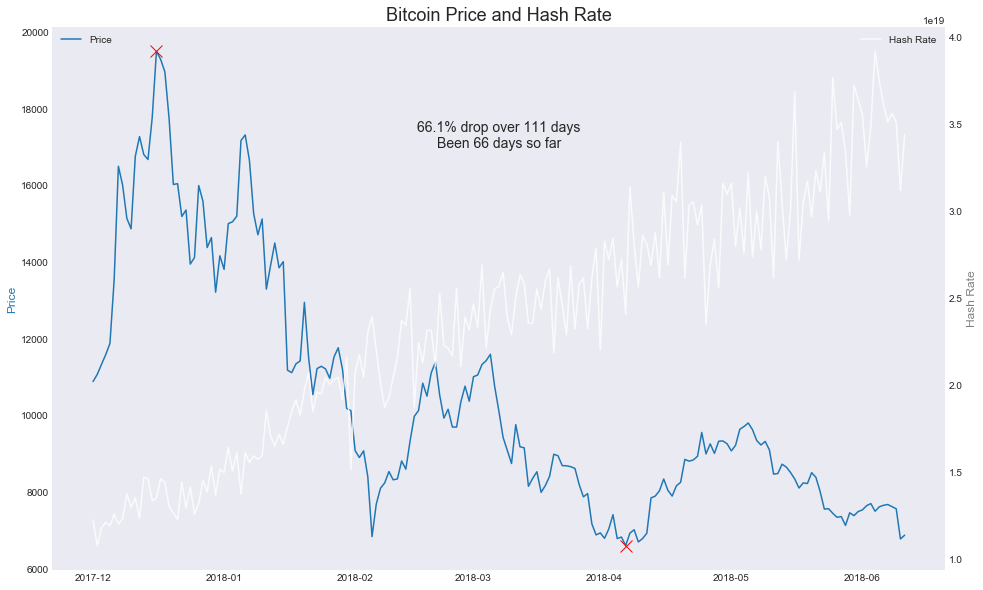

In [112]:
draw_chart(3,[0.5,0.8], save = True)

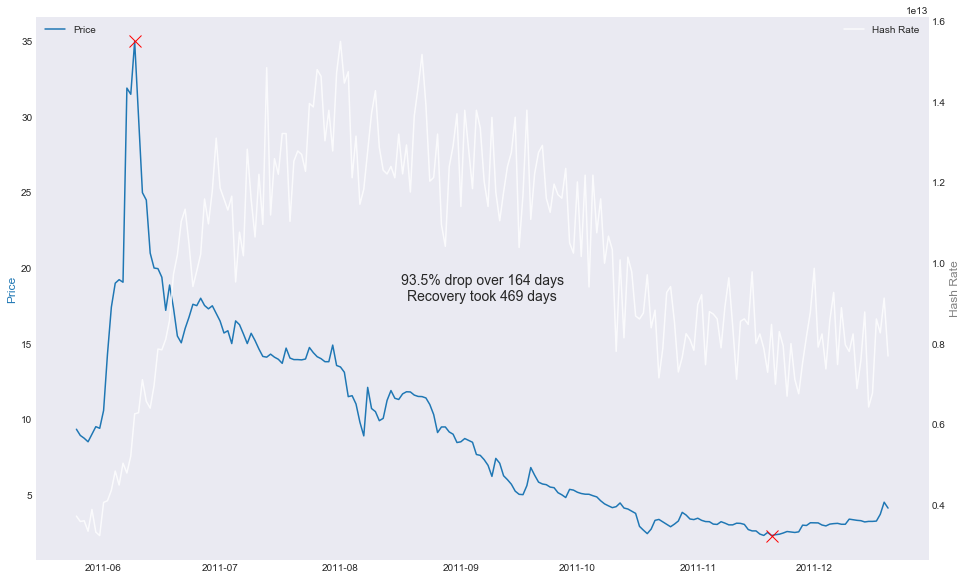

In [86]:
# plot each of the drawdowns to see the patterns
# 1 tera hash = 1 trillion hashes / sec

extra_days = 15 # add some extra days on either side

for index, row in bitcoin_drawdowns.iterrows():    
    if index > 0:
        break
    if row['dd'] < 25: # drawdowns of 25% or more
        break
    draw_chart(index)

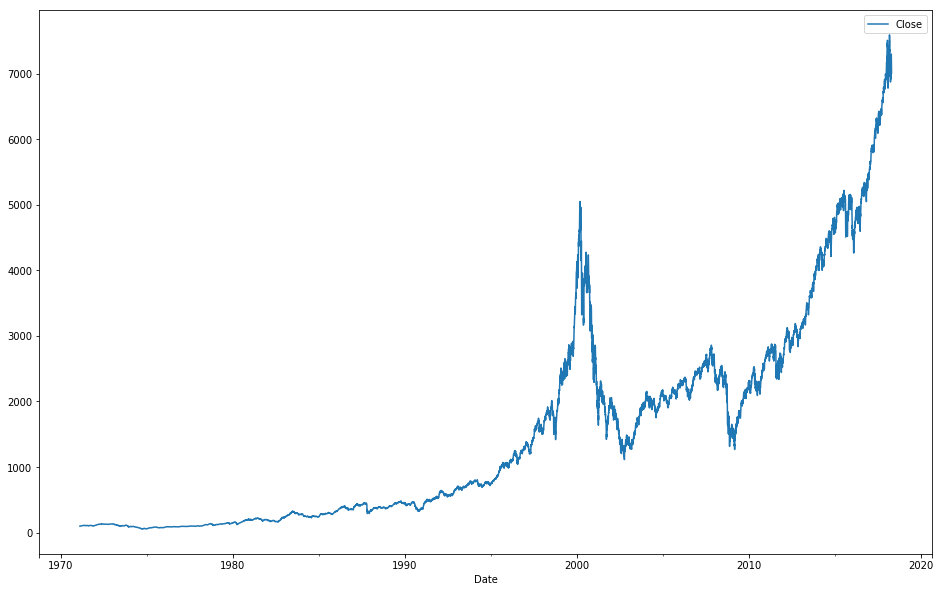

In [30]:
# Do same for Nasdaq
nasdaq_full.plot(figsize=(16,10));

In [36]:
nasdaq_drawdowns = MABacktester(nasdaq_full['Close']).drawdowns(target='market')
nasdaq_drawdowns

,dd,high,low,highd,lowd,days,recoveryd,rdays
0,77.93,5048.62,1114.11,2000-03-10,2002-10-09,943 days,2015-04-23,4579 days
1,59.90,136.84,54.87,1973-01-11,1974-10-03,630 days,1978-09-07,1435 days
2,55.63,2859.12,1268.64,2007-10-31,2009-03-09,495 days,2011-04-27,779 days
3,35.89,455.26,291.88,1987-08-26,1987-10-28,63 days,1989-08-03,645 days
4,33.00,485.73,325.44,1989-10-09,1990-10-16,372 days,1991-04-02,168 days
5,31.50,328.91,225.30,1983-06-24,1984-07-25,397 days,1986-01-07,531 days
6,29.55,2014.25,1419.12,1998-07-20,1998-10-08,80 days,1998-11-27,50 days
7,28.79,223.47,159.14,1981-05-29,1982-08-13,441 days,1982-11-04,83 days


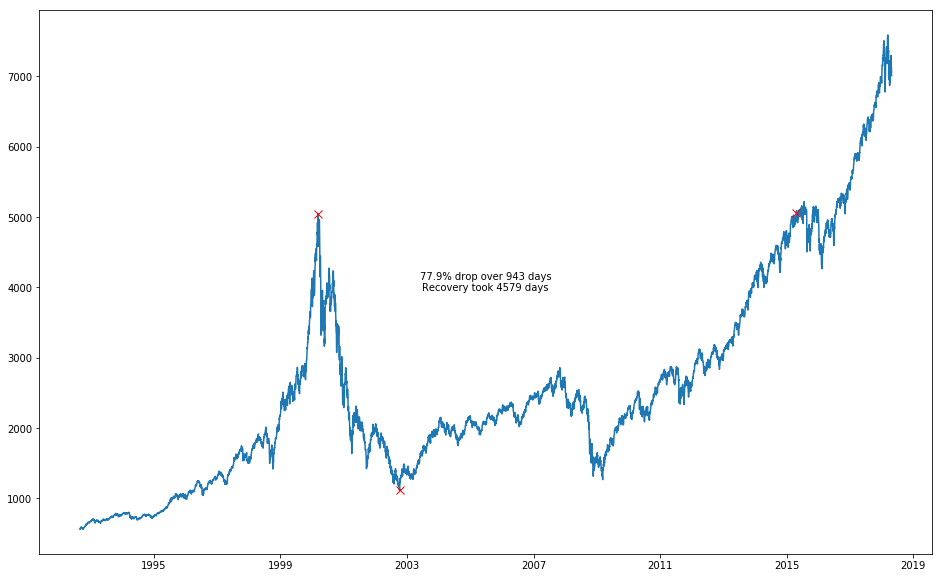

In [17]:
# plot each of the drawdowns to see the patterns

extra_days = 15 # add some extra days on either side

for index, row in nasdaq_drawdowns.iterrows():    
    if index > 0:
        break
    if row['dd'] < 25: # drawdowns of 25% or more
        break
    high = row['highd']
    recovery = row['recoveryd']
    low = row['lowd']
    start = high - timedelta(days=extra_days * row['rdays'].days / 25)
    end = recovery + timedelta(days=extra_days * row['rdays'].days / 25)
    fig, ax = plt.subplots(figsize=(16,10))
    ax.plot(nasdaq_full['Close'].loc[start:end].index, nasdaq_full['Close'].loc[start:end])       
    text = "%.1f%% drop over %d days\nRecovery took %d days" % (row['dd'],row['days'].days,row['rdays'].days)
    ax.plot([high, low, recovery], [nasdaq_full['Close'].loc[high], nasdaq_full['Close'].loc[low], nasdaq_full['Close'].loc[recovery]], 'x', color='Red', markersize=8)
    ax.text(0.5, 0.5,text, horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    #fig.savefig("drawdowns/nasdaq/" + high.strftime("%Y-%m-%d") + '.png', dpi=100, bbox_inches='tight')
    #plt.close(fig)

In [37]:
bitcoin_drawdowns.sort_values('highd', ascending = True, inplace = True)
bitcoin_drawdowns.set_index('highd', inplace = True)

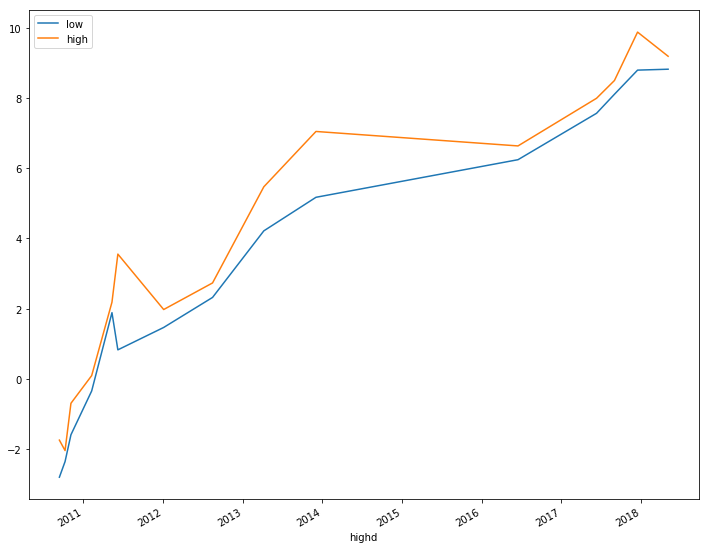

In [41]:
# on a log scale the sequence of lows in each succesive cycle are roughly a straight line (so exp growth)
# same for the sequence of highs
np.log(bitcoin_drawdowns[['low','high']]).plot(figsize=(12,10));